# Analysis and Comparison of Urban Transportation Network Design in Minneapolis, United States and Lyon, France

### Luke Zaruba, University of Minnesota 
#### GEOG 5541: <i>Principles of Geocomputing</i>
#### Graduate Student Project

The goal of this project is to better understand and quantify differences in urban transportation network form and design between American and European cities. I have utilized advanced morphological analysis tools found in <a href = "https://pysal.org">PySAL</a> and <a href = "http://docs.momepy.org/en/stable/#">momepy</a> to quantify the spatial layout and design of the street networks in the study areas, in order to compare the results.

I decided to use Minneapolis, Minnesota and Lyon, France, due to their similarities in population size, as well as their similarity in geographic features, like the lack of mountains or coastline, which could heavily influence the design and layout of the cities. They also do have major rivers (the Rhone in Lyon and the Mississippi in Minneapolis) running through the middle of the cities, which does make them fairly similar.

In [1]:
# IMPORTING LIBRARIES
import pandas as pd
import geopandas as gpd
import numpy as np
import momepy as mp
import osmnx as ox
import matplotlib.pyplot as plt
import scipy.stats as st

%matplotlib inline

/Users/lukezaruba/opt/anaconda3/lib/python3.8/site-packages/geopandas/_compat.py:111: UserWarning: The Shapely GEOS version (3.9.1-CAPI-1.14.2) is incompatible with the GEOS version PyGEOS was compiled with (3.10.1-CAPI-1.16.0). Conversions between both will be slow.
  warnings.warn(


## Exploring Street Network Linearity
#### Lyon, France

/Users/lukezaruba/opt/anaconda3/lib/python3.8/site-packages/osmnx/geocoder.py:110: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(_geocode_query_to_gdf(q, wr, by_osmid))


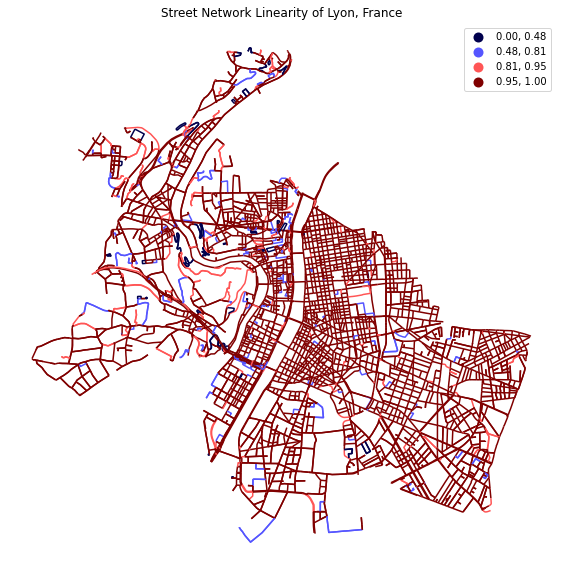

In [2]:
# LOADING IN OSM DATA FOR LYON AND CONVERTING TO EDGES IN MOMEPY
streetsLyon = ox.graph_from_place("Lyon, France", network_type = "drive")
streetsLyon = ox.projection.project_graph(streetsLyon)

edgesLyon = ox.graph_to_gdfs(streetsLyon, nodes = False, edges = True, node_geometry = False, fill_edge_geometry = True)

# CALCULATING EDGE LINEARITY
linearityLyon = mp.Linearity(edgesLyon)
edgesLyon["linearity"] = linearityLyon.series

# PLOTTING STREET NETWORK LINEARITY
f, ax = plt.subplots(figsize=(10, 10))
edgesLyon.plot(ax = ax, column = "linearity", legend = True, cmap = "seismic", scheme = "natural_breaks", k = 4)
plt.title("Street Network Linearity of Lyon, France")
ax.set_axis_off()
plt.show()

In [3]:
# EXPLORING EDGE DATA FOR LYON
edgesLyon["linearity"].describe()

count    8523.000000
mean        0.980835
std         0.077672
min         0.000000
25%         0.997426
50%         0.999974
75%         1.000000
max         1.000000
Name: linearity, dtype: float64

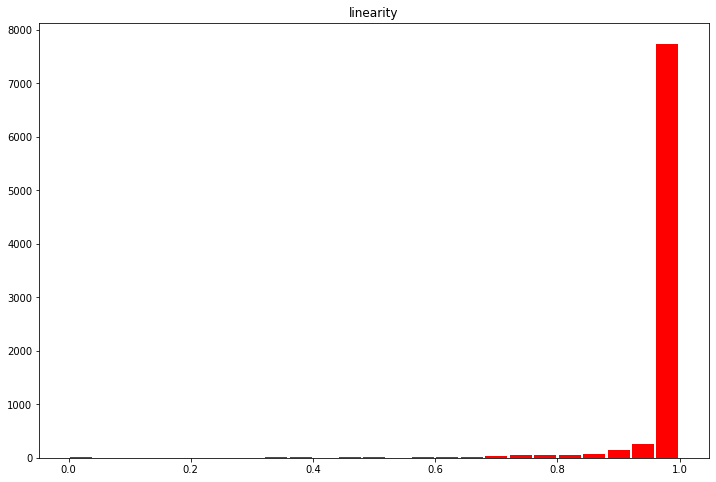

In [4]:
# HISTOGRAM OF EDGE LINEARITY FOR LYON
ax = edgesLyon.hist(column = "linearity", bins = 25, grid = False, figsize = (12,8), color = "red", zorder = 2, rwidth = 0.9)

plt.show()

#### Minneapolis, United States

/Users/lukezaruba/opt/anaconda3/lib/python3.8/site-packages/osmnx/geocoder.py:110: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  gdf = gdf.append(_geocode_query_to_gdf(q, wr, by_osmid))


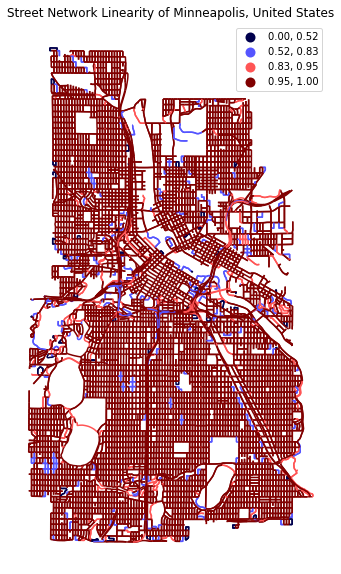

In [5]:
# LOADING IN OSM DATA FOR MINNEAPOLIS AND CONVERTING TO EDGES IN MOMEPY
streetsMpls = ox.graph_from_place("Minneapolis, United States", network_type = "drive")
streetsMpls = ox.projection.project_graph(streetsMpls)

edgesMpls = ox.graph_to_gdfs(streetsMpls, nodes = False, edges = True, node_geometry = False, fill_edge_geometry = True)

# CALCULATING EDGE LINEARITY
linearityMpls = mp.Linearity(edgesMpls)
edgesMpls["linearity"] = linearityMpls.series

# PLOTTING STREET NETWORK LINEARITY
f, ax = plt.subplots(figsize=(10, 10))
edgesMpls.plot(ax = ax, column = "linearity", legend = True, cmap = "seismic", scheme = "natural_breaks", k = 4)
plt.title("Street Network Linearity of Minneapolis, United States")
ax.set_axis_off()
plt.show()

In [6]:
# EXPLORING EDGE DATA FOR MINNEAPOLIS
edgesMpls["linearity"].describe()

count    23556.000000
mean         0.987969
std          0.060305
min          0.000000
25%          0.999954
50%          1.000000
75%          1.000000
max          1.000000
Name: linearity, dtype: float64

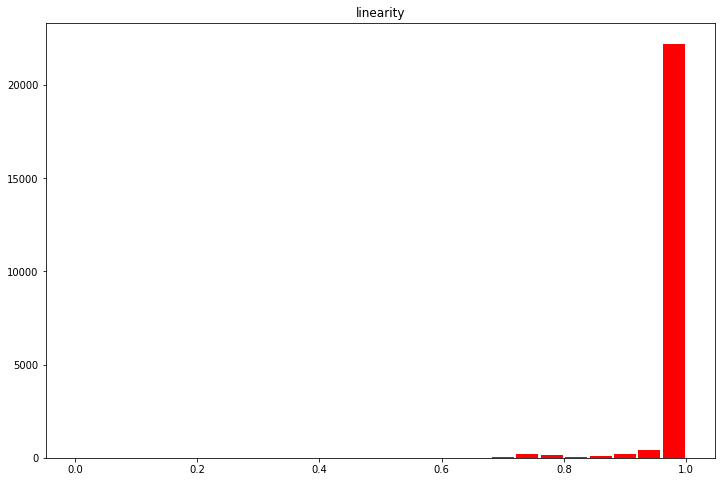

In [7]:
# HISTOGRAM OF EDGE LINEARITY FOR MINNEAPOLIS
ax = edgesMpls.hist(column = "linearity", bins = 25, grid = False, figsize = (12,8), color = "red", zorder = 2, rwidth = 0.9)

plt.show()

## T-Test of Street Network Linearity
To test for a statistically significant difference between the mean linearity values for Lyon and Minneapolis, a T-test can be utilized calculate a p-value. A p-value below the alpha value indicates a statistically significant difference between the means of the two samples, while a p-value above the alpha value indicates no statistically significant difference. Alpha values ($\alpha$) represent the threshold of statistical significance, and is arbitrary. Generally speaking, an $\alpha$ of 0.05 is a standard used by many researchers in a wide variety of fields.

Additionally, it should be noted that there are several different types of T-tests, but in this case we are using a two-sample or independent T-test, since we are comparing the means of two independent samples.

In [8]:
# CLEANING AND PREPPING DATA FOR T-TEST
edgesMpls["location"] = "Minneapolis"
edgesLyon["location"] = "Lyon"

mplsLinearityDf = edgesMpls[["linearity", "location"]].copy()
lyonLinearityDf = edgesLyon[["linearity", "location"]].copy()

combinedLinearityDf = pd.concat([mplsLinearityDf, lyonLinearityDf], ignore_index = True)

# T-TEST FOR LINEARITY
mpls = combinedLinearityDf.loc[combinedLinearityDf["location"] == "Minneapolis", "linearity"].to_numpy()
lyon = combinedLinearityDf.loc[combinedLinearityDf["location"] == "Lyon", "linearity"].to_numpy()

ttestlin = st.ttest_ind(a = mpls, b = lyon, equal_var = True)

# DISPLAYING RESULTS
print(ttestlin)

Ttest_indResult(statistic=8.63397120239692, pvalue=6.194805237498498e-18)


## Analysis of Street Network Linearity Comparison
As can be seen through the previous maps, graphs, and metrics, there is evidence showing that the street networks between the two cities do have statistically significant differences in their average linearity. Although, it can be hard to tell through some of the initial data visualizations, the t-test results are very convincing, with a p-value well below the alpha value.
<br>
<br>
H<sub>0</sub>: There is no statisically significant difference between X̄<sub>Lyon</sub> and X̄<sub>Minneapolis</sub>
<br>
H<sub>a</sub>: There is a statisically significant difference between X̄<sub>Lyon</sub> and X̄<sub>Minneapolis</sub>
<br>
<br>
p = 6.2e-18
<br>
$\alpha$ = 0.05
<br>
<br>
p < $\alpha$ ∴ Reject the H<sub>0</sub>

## Exploring Street Profile & Other Associated Attributes
#### Lyon, France

In [9]:
# LOADING BUILDINGS - DOWNTOWN LYON
buildingsLyonDT = ox.geometries.geometries_from_point((45.752003, 4.844941), dist = 2000, tags = {"building":True})
buildingsLyonDT = ox.projection.project_gdf(buildingsLyonDT)
buildingsLyonDT = buildingsLyonDT[buildingsLyonDT.geom_type.isin(["Polygon", "MultiPolygon"])]

# NOTE: This function was taken directly from momepy's documentation, which is linked at the top of this notebook
def cleanHeights(heightValue):
    try:
        return float(heightValue)
    except ValueError:
        return 0

buildingsLyonDT["height"] = buildingsLyonDT["height"].fillna(0).apply(cleanHeights)
buildingsLyonDT = buildingsLyonDT.reset_index().explode()
buildingsLyonDT.reset_index(inplace = True, drop = True)

# LOADING STREETS - DOWNTOWN LYON
streetsLyonDT = ox.graph_from_point((45.752003, 4.844941), dist = 2000, network_type = "drive")
streetsLyonDT = ox.projection.project_graph(streetsLyonDT)
edgesLyonDT = ox.graph_to_gdfs(streetsLyonDT, nodes = False, edges = True, node_geometry = False, fill_edge_geometry = True)

/Users/lukezaruba/opt/anaconda3/lib/python3.8/site-packages/osmnx/geometries.py:805: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  for merged_outer_linestring in list(merged_outer_linestrings):
/Users/lukezaruba/opt/anaconda3/lib/python3.8/site-packages/osmnx/geometries.py:805: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a multi-part geometry.
  for merged_outer_linestring in list(merged_outer_linestrings):
<ipython-input-9-43604ba22824>:14: FutureWarning: Currently, index_parts defaults to True, but in the future, it will default to False to be consistent with Pandas. Use `index_parts=True` to keep the current behavior and True/False to silence the warning.
  buildingsLyonDT = buildingsLyon

In [10]:
# CREATING PROFILE - LYON
lyonProfile = mp.StreetProfile(edgesLyonDT, buildingsLyonDT, heights = "height")

# ADDING ATTRIBUTE TO EDGES
edgesLyonDT["widths"] = lyonProfile.w
edgesLyonDT["width_deviations"] = lyonProfile.wd
edgesLyonDT["openness"] = lyonProfile.o
edgesLyonDT["profile"] = lyonProfile.p

/Users/lukezaruba/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Users/lukezaruba/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/lukezaruba/opt/anaconda3/lib/python3.8/site-packages/momepy/dimension.py:641: RuntimeWarning: invalid value encountered in long_scalars
  openness.append(np.isnan(s).sum() / (f).sum())


/Users/lukezaruba/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


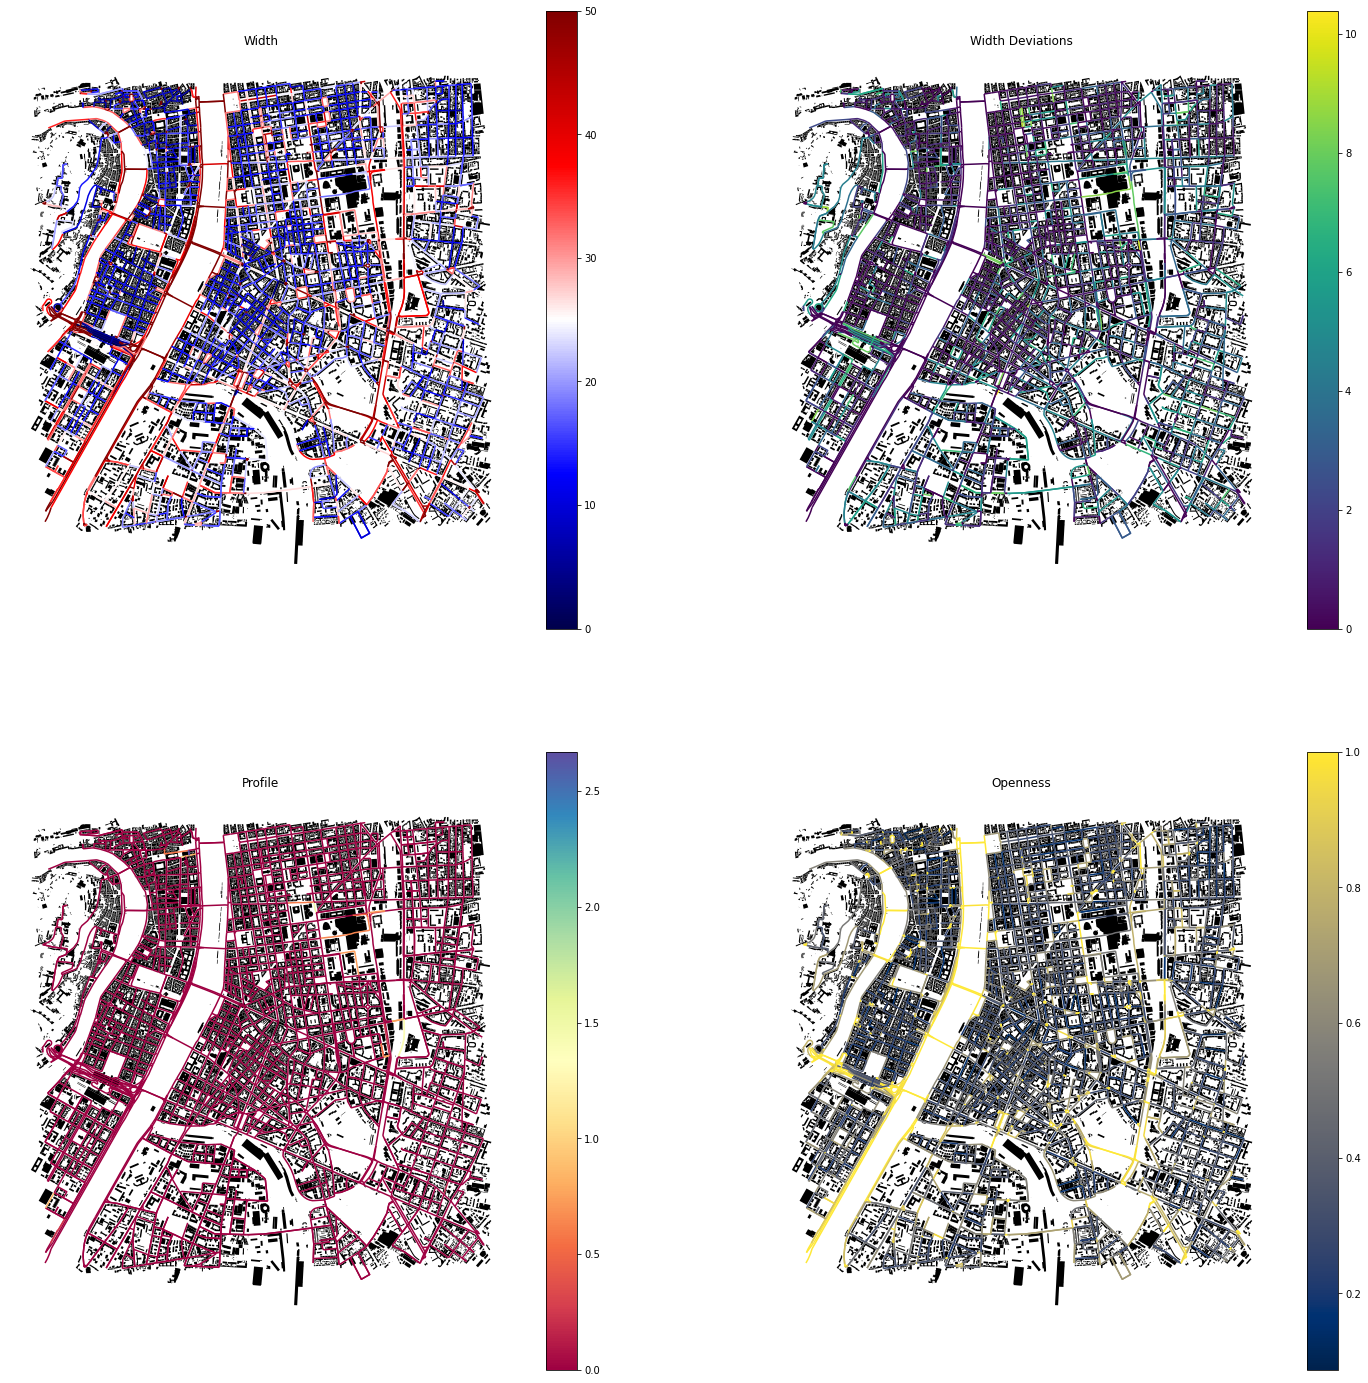

In [11]:
# CREATING PLOTS - LYON
f, axes = plt.subplots(figsize = (25, 25), ncols = 2, nrows = 2)

edgesLyonDT.plot(ax=axes[0][0], column = "widths", legend = True, cmap = "seismic")
buildingsLyonDT.plot(ax=axes[0][0], color = "black")

edgesLyonDT.plot(ax=axes[0][1], column = "width_deviations", legend = True, cmap = "viridis")
buildingsLyonDT.plot(ax=axes[0][1], color = "black")

edgesLyonDT.plot(ax=axes[1][0], column = "profile", legend = True, cmap = "Spectral")
buildingsLyonDT.plot(ax=axes[1][0], color = "black")

edgesLyonDT.plot(ax=axes[1][1], column = "openness", legend = True, cmap = "cividis")
buildingsLyonDT.plot(ax=axes[1][1], color = "black")

axes[0][0].set_axis_off()
axes[0][0].set_title("Width")
axes[0][1].set_axis_off()
axes[0][1].set_title("Width Deviations")
axes[1][0].set_axis_off()
axes[1][0].set_title("Profile")
axes[1][1].set_axis_off()
axes[1][1].set_title("Openness")

plt.show()

#### Minneapolis, United States

In [12]:
# LOADING BUILDINGS - DOWNTOWN MINNEAPOLIS
buildingsMplsDT = ox.geometries.geometries_from_point((44.975195, -93.267017), dist = 2000, tags = {"building":True})
buildingsMplsDT = ox.projection.project_gdf(buildingsMplsDT)
buildingsMplsDT = buildingsMplsDT[buildingsMplsDT.geom_type.isin(["Polygon", "MultiPolygon"])]

# NOTE: This function was taken directly from momepy's documentation, which is linked at the top of this notebook
def cleanHeights(heightValue):
    try:
        return float(heightValue)
    except ValueError:
        return 0

buildingsMplsDT["height"] = buildingsMplsDT["height"].fillna(0).apply(cleanHeights)
buildingsMplsDT = buildingsMplsDT.reset_index().explode()
buildingsMplsDT.reset_index(inplace = True, drop = True)

# LOADING STREETS - DOWNTOWN MINNEAPOLIS
streetsMplsDT = ox.graph_from_point((44.975195, -93.267017), dist = 2000, network_type = "drive")
streetsMplsDT = ox.projection.project_graph(streetsMplsDT)
edgesMplsDT = ox.graph_to_gdfs(streetsMplsDT, nodes = False, edges = True, node_geometry = False, fill_edge_geometry = True)

/Users/lukezaruba/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Users/lukezaruba/opt/anaconda3/lib/python3.8/site-packages/osmnx/geometries.py:805: ShapelyDeprecationWarning: __len__ for multi-part geometries is deprecated and will be removed in Shapely 2.0. Check the length of the `geoms` property instead to get the  number of parts of a multi-part geometry.
  for merged_outer_linestring in list(merged_outer_linestrings):
/Users/lukezaruba/opt/anaconda3/lib/python3.8/site-packages/osmnx/geometries.py:805: ShapelyDeprecationWarning: Iteration over multi-part geometries is deprecated and will be removed in Shapely 2.0. Use the `geoms` property to access the constituent parts of a 

In [13]:
# CREATING PROFILE - MINNEAPOLIS
mplsProfile = mp.StreetProfile(edgesMplsDT, buildingsMplsDT, heights = "height")

# ADDING ATTRIBUTE TO EDGES
edgesMplsDT["widths"] = mplsProfile.w
edgesMplsDT["width_deviations"] = mplsProfile.wd
edgesMplsDT["openness"] = mplsProfile.o
edgesMplsDT["profile"] = mplsProfile.p

/Users/lukezaruba/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/Users/lukezaruba/opt/anaconda3/lib/python3.8/site-packages/numpy/lib/nanfunctions.py:1879: RuntimeWarning: Degrees of freedom <= 0 for slice.
  var = nanvar(a, axis=axis, dtype=dtype, out=out, ddof=ddof,
/Users/lukezaruba/opt/anaconda3/lib/python3.8/site-packages/momepy/dimension.py:641: RuntimeWarning: invalid value encountered in long_scalars
  openness.append(np.isnan(s).sum() / (f).sum())


/Users/lukezaruba/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


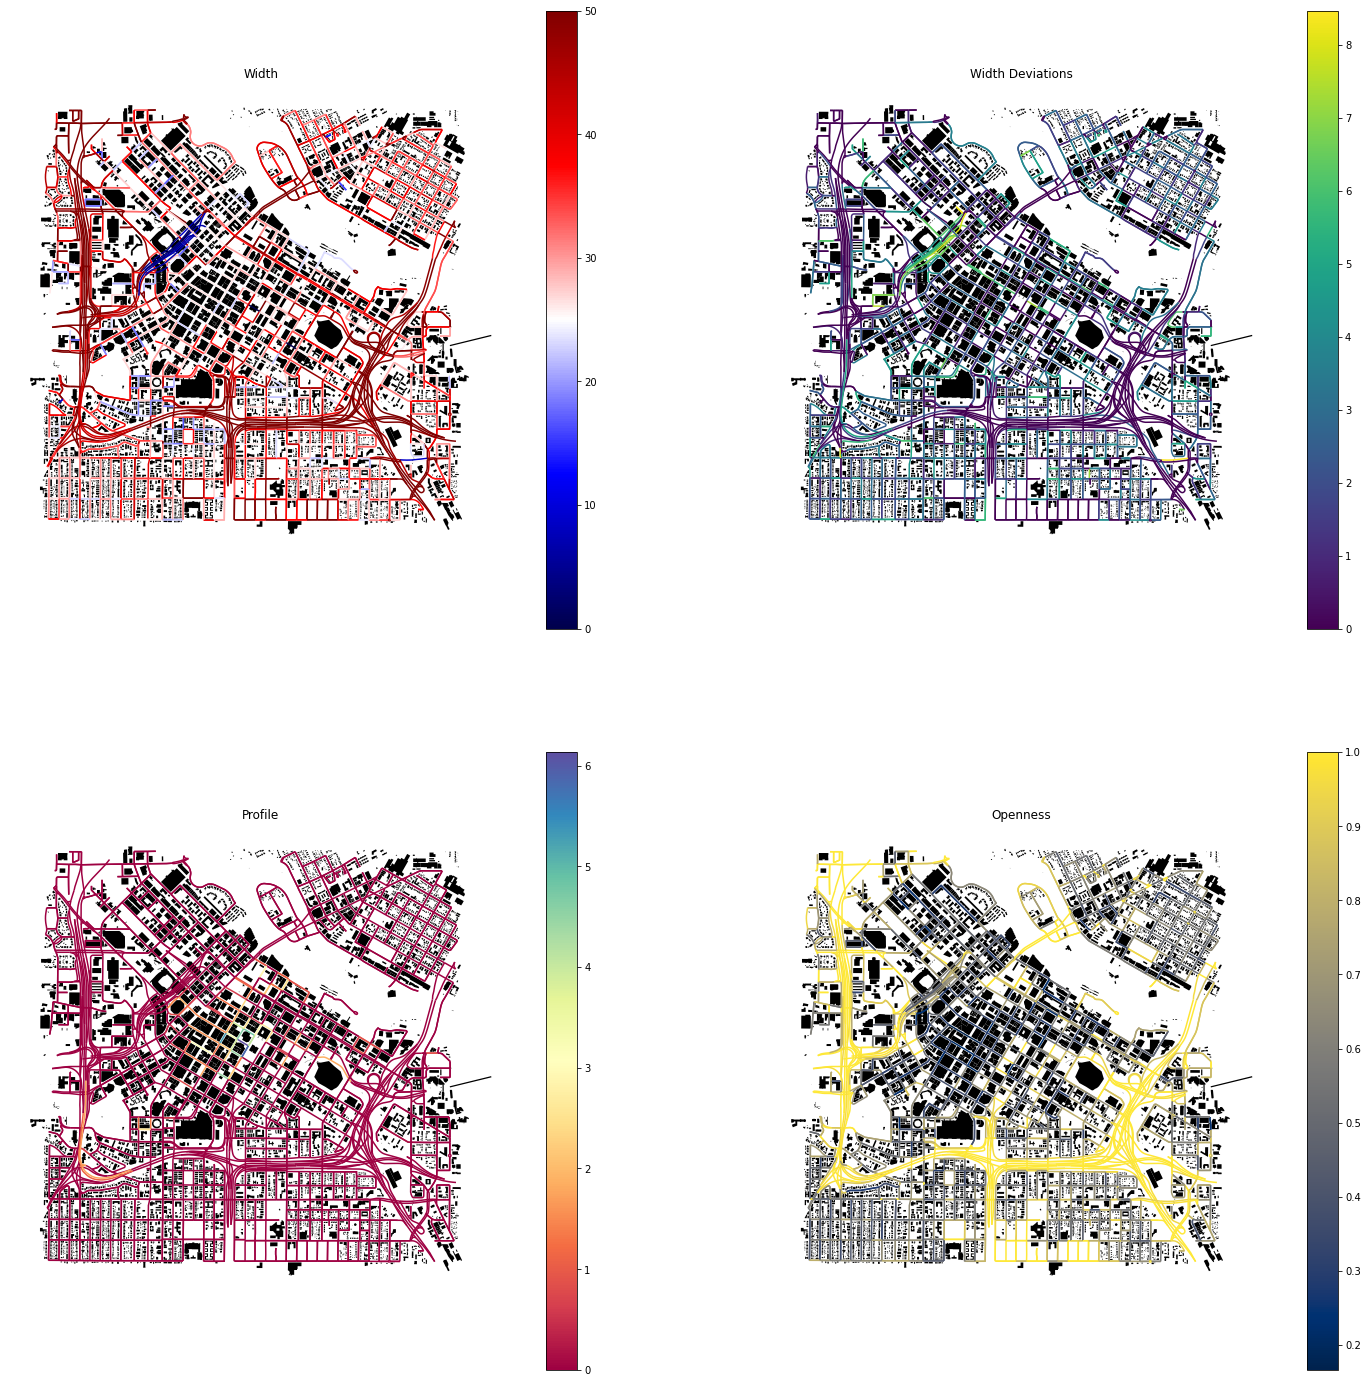

In [14]:
# CREATING PLOTS - MINNEAPOLIS
f, axes = plt.subplots(figsize = (25, 25), ncols = 2, nrows = 2)

edgesMplsDT.plot(ax=axes[0][0], column = "widths", legend = True, cmap = "seismic")
buildingsMplsDT.plot(ax=axes[0][0], color = "black")

edgesMplsDT.plot(ax=axes[0][1], column = "width_deviations", legend = True, cmap = "viridis")
buildingsMplsDT.plot(ax=axes[0][1], color = "black")

edgesMplsDT.plot(ax=axes[1][0], column = "profile", legend = True, cmap = "Spectral")
buildingsMplsDT.plot(ax=axes[1][0], color = "black")

edgesMplsDT.plot(ax=axes[1][1], column = "openness", legend = True, cmap = "cividis")
buildingsMplsDT.plot(ax=axes[1][1], color = "black")

axes[0][0].set_axis_off()
axes[0][0].set_title("Width")
axes[0][1].set_axis_off()
axes[0][1].set_title("Width Deviations")
axes[1][0].set_axis_off()
axes[1][0].set_title("Profile")
axes[1][1].set_axis_off()
axes[1][1].set_title("Openness")

plt.show()

## T-Test for Profile Attributes

In [15]:
# ADDING IN LOCATION COLUMN
edgesMplsDT["location"] = "Minneapolis"
edgesLyonDT["location"] = "Lyon"

# CREATING DF WITH ONLY THE NEEDED ATTRIBUTE FIELDS
profileStatsMplsDT = edgesMplsDT[["widths", "width_deviations", "openness", "profile", "location"]].copy()
profileStatsLyonDT = edgesLyonDT[["widths", "width_deviations", "openness", "profile", "location"]].copy()

# COMBINING THE DFS
combinedProfileStats = pd.concat([profileStatsMplsDT, profileStatsLyonDT], ignore_index = True)

# FILLING NAN VALUES
combinedProfileStats["profile"] = combinedProfileStats["profile"].replace(np.nan, 0)

/Users/lukezaruba/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [16]:
# T-TEST FOR WIDTH
mplsWidths = combinedProfileStats.loc[combinedProfileStats["location"] == "Minneapolis", "widths"].to_numpy()
lyonWidths = combinedProfileStats.loc[combinedProfileStats["location"] == "Lyon", "widths"].to_numpy()

widthTTest = st.ttest_ind(a = mplsWidths, b = lyonWidths, equal_var = True)

# T-TEST FOR WIDTH DEVIATION
mplsWidthDev = combinedProfileStats.loc[combinedProfileStats["location"] == "Minneapolis", "width_deviations"].to_numpy()
lyonWidthDev = combinedProfileStats.loc[combinedProfileStats["location"] == "Lyon", "width_deviations"].to_numpy()

widthDevTTest = st.ttest_ind(a = mplsWidthDev, b = lyonWidthDev, equal_var = True)

# T-TEST FOR OPENNESS
mplsOpenness = combinedProfileStats.loc[combinedProfileStats["location"] == "Minneapolis", "openness"].to_numpy()
lyonOpenness = combinedProfileStats.loc[combinedProfileStats["location"] == "Lyon", "openness"].to_numpy()

opennessTTest = st.ttest_ind(a = mplsOpenness, b = lyonOpenness, equal_var = True)

# T-TEST FOR PROFILE
mplsProfile = combinedProfileStats.loc[combinedProfileStats["location"] == "Minneapolis", "profile"].to_numpy()
lyonProfile = combinedProfileStats.loc[combinedProfileStats["location"] == "Lyon", "profile"].to_numpy()

profileTTest = st.ttest_ind(a = mplsProfile, b = lyonProfile, equal_var = True)

/Users/lukezaruba/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [17]:
# RUNNING BASIC STATISTICS ON OPENNESS
mplsWStat = profileStatsMplsDT["widths"].describe()
lyonWStat = profileStatsLyonDT["widths"].describe()

mplsWDStat = profileStatsMplsDT["width_deviations"].describe()
lyonWDStat = profileStatsLyonDT["width_deviations"].describe()

mplsOStat = profileStatsMplsDT["openness"].describe()
lyonOStat = profileStatsLyonDT["openness"].describe()

mplsPStat = profileStatsMplsDT["profile"].describe()
lyonPStat = profileStatsLyonDT["profile"].describe()

In [18]:
# DISPLAYING RESULTS - WIDTH
print("MINNEAPOLIS - WIDTH: " + "\n" + str(mplsWStat) + "\n")
print("LYON - WIDTH: " + "\n" + str(lyonWStat)+ "\n")
print("WIDTH:" + "\n" + str(widthTTest))

MINNEAPOLIS - WIDTH: 
count    2643.000000
mean       36.686750
std         9.968937
min         0.000000
25%        28.299075
50%        36.074755
75%        48.026317
max        50.000000
Name: widths, dtype: float64

LYON - WIDTH: 
count    3648.000000
mean       28.040771
std        14.726541
min         0.000000
25%        14.494012
50%        25.630476
75%        41.415419
max        50.000000
Name: widths, dtype: float64

WIDTH:
Ttest_indResult(statistic=26.15206251239558, pvalue=3.361435403950851e-143)


/Users/lukezaruba/opt/anaconda3/lib/python3.8/site-packages/ipykernel/ipkernel.py:287: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [19]:
# DISPLAYING RESULTS - WIDTH DEVIATION
print("MINNEAPOLIS - WIDTH DEVIATION: " + "\n" + str(mplsWDStat) + "\n")
print("LYON - WIDTH DEVIATION: " + "\n" + str(lyonWDStat)+ "\n")
print("WIDTH DEVIATION:" + "\n" + str(widthDevTTest))

MINNEAPOLIS - WIDTH DEVIATION: 
count    2643.000000
mean        1.645616
std         1.645568
min         0.000000
25%         0.000000
50%         1.392845
75%         2.750869
max         8.469060
Name: width_deviations, dtype: float64

LYON - WIDTH DEVIATION: 
count    3648.000000
mean        1.690037
std         2.041532
min         0.000000
25%         0.005685
50%         0.748960
75%         2.849606
max        10.387990
Name: width_deviations, dtype: float64

WIDTH DEVIATION:
Ttest_indResult(statistic=-0.9223749089874039, pvalue=0.3563684362694012)


In [20]:
# DISPLAYING RESULTS - OPENNESS
print("MINNEAPOLIS - OPENNESS: " + "\n" + str(mplsOStat) + "\n")
print("LYON - OPENNESS: " + "\n" + str(lyonOStat)+ "\n")
print("OPENNESS:" + "\n" + str(opennessTTest))

MINNEAPOLIS - OPENNESS: 
count    2643.000000
mean        0.713914
std         0.221069
min         0.166667
25%         0.541667
50%         0.700000
75%         0.959167
max         1.000000
Name: openness, dtype: float64

LYON - OPENNESS: 
count    3648.000000
mean        0.584933
std         0.276875
min         0.086957
25%         0.333333
50%         0.500000
75%         0.833333
max         1.000000
Name: openness, dtype: float64

OPENNESS:
Ttest_indResult(statistic=19.80763941760288, pvalue=9.395602399455805e-85)


In [21]:
# DISPLAYING RESULTS - PROFILE
print("MINNEAPOLIS - PROFILE: " + "\n" + str(mplsPStat) + "\n")
print("LYON - PROFILE: " + "\n" + str(lyonPStat)+ "\n")
print("PROFILE:" + "\n" + str(profileTTest))

MINNEAPOLIS - PROFILE: 
count    2640.000000
mean        0.073513
std         0.436696
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         6.134490
Name: profile, dtype: float64

LYON - PROFILE: 
count    3643.000000
mean        0.005950
std         0.087848
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         2.668292
Name: profile, dtype: float64

PROFILE:
Ttest_indResult(statistic=9.089260467353032, pvalue=1.3133698319033825e-19)


## Analysis of Street Network Openness, Profile, Width, and Width Deviation
Exploring these attributes was rather difficult at times, but the analysis does show some key differences behind the history and philosophy of transportation network design in the United States and Europe. Width and openness are the two attributes that are most helpful in identifying this, especially when examining the role of the U.S. Interstate Highway System on urban design in the United States. This project is not as much about explaining these differences in transportation network/urban design and their origins and causes, but this project does show that these differences are real and very clear.

A couple links to sources explaining <i> why </i> the spatial layouts of American and European cities (and their transportation networks) differ:
<br>
<a href = "https://www.brookings.edu/articles/are-europes-cities-better/"> Brookings - Are Europe's Cities Better? (Article)</a>
<br>
<a href = "https://www.youtube.com/watch?v=Xlddp3qNdro"> Geography Geek - American Cities vs European Cities: What's the Difference? (Video)</a>
<br>
<a href = "https://www.researchgate.net/profile/Anzhelika-Antipova/publication/325040922_Urban_Environment_The_Differences_between_the_City_in_Europe_and_the_United_States/links/6240f5215e2f8c7a03441910/Urban-Environment-The-Differences-between-the-City-in-Europe-and-the-United-States.pdf"> A. Antipova - Urban Environment: The Differences between the City in Europe
and the United States (Journal Article)</a>

The following hypotheses were true for all four of the attribute fields that were used in the T-Tests.
<br>
<br>
H<sub>0</sub>: There is no statisically significant difference between X̄<sub>Lyon</sub> and X̄<sub>Minneapolis</sub>
<br>
H<sub>a</sub>: There is a statisically significant difference between X̄<sub>Lyon</sub> and X̄<sub>Minneapolis</sub>
<br>
<br>
Here is a brief summary of the T-Test results:
<br>
<br>
<b> WIDTH </b>
<br>
p = 3.4e-143
<br>
$\alpha$ = 0.05
<br>
p < $\alpha$ ∴ Reject the H<sub>0</sub>
<br>
<b> WIDTH DEVIATION</b>
<br>
p = 0.36
<br>
$\alpha$ = 0.05
<br>
p > $\alpha$ ∴ Fail to reject the H<sub>0</sub>
<br>
<b> OPENNESS </b>
<br>
p = 9.4e-85
<br>
$\alpha$ = 0.05
<br>
p < $\alpha$ ∴ Reject the H<sub>0</sub>
<br>
<b> PROFILE </b>
<br>
p = 1.3e-19
<br>
$\alpha$ = 0.05
<br>
p < $\alpha$ ∴ Reject the H<sub>0</sub>

## Concluding Remarks
As far as the analysis goes, I'd say that it was successful at showing that there are differences in street design and network design, between the United States and Europe. These differences can be associated with differences in urbanization processes, urban sprawl and growth patterns, urban design philosophy, and much more. We especially see the effects of the U.S. Interstate Highway System and the importance that planners, engineers, and designers have placed on the system, since the U.S. is a more car-centric society, compared to Europe.

Additionally, this project allowed me to explore two new packages that I wasn't familar with, momepy and osmnx. Momepy has some really cool features and there are lots of other opportunities to model and analyze urban spaces. However, I was most impressed with osmnx, due to the ease of rapidly accessing free, open-source data, from anywhere around the world. Obviously, there are some limitations to this, but it is a pretty easy and powerful tool to use.

#### <u>NOTE:</u>
The following code is used to hide warnings that appear in this notebook, mostly due to future deprecation
notices. These warnings do not affect the results in any way.

Unfortunately, I'm not much of a Javascript or CSS guru, so I copied this code. The links to the code source and the author's
Stack Overflow account are listed below.

Code: https://stackoverflow.com/questions/9031783/hide-all-warnings-in-ipython

Author: https://stackoverflow.com/users/1417396/robert

In [22]:
%%javascript
(function(on) {
const e=$( "<a>Setup failed</a>" );
const ns="js_jupyter_suppress_warnings";
var cssrules=$("#"+ns);
if(!cssrules.length) cssrules = $("<style id='"+ns+"' type='text/css'>div.output_stderr { } </style>").appendTo("head");
e.click(function() {
    var s='Showing';  
    cssrules.empty()
    if(on) {
        s='Hiding';
        cssrules.append("div.output_stderr, div[data-mime-type*='.stderr'] { display:none; }");
    }
    e.text(s+' warnings (click to toggle)');
    on=!on;
}).click();
$(element).append(e);
})(true);

<IPython.core.display.Javascript object>